The equations of motion for  a particle on a sphere is

$  \frac{d \theta(t)}{dt} = \pm \sqrt{ \dot{\theta}_0^2 + \dot{\varphi}_0^2 \sin^4(\theta_0)\left( \frac{1}{\sin^2(\theta_0)}-\frac{1}{\sin^2(\theta(t))} \right) } $

 $ \frac{d \varphi(t)}{dt} = \dot{\varphi}_0\frac{\sin^2(\theta_0)}{\sin^2(\theta(t))}$

 with boundary conditions $\varphi(0)=\varphi_0$ and $\theta(0)=\theta_0$. the constants $\dot{\varphi}_0$ and $\dot{\theta_0}$ are the initial angular velocities.

Now square both sides of the first equation

$  \big[\frac{d \theta(t)}{dt}\big]^2 =  \dot{\theta}_0^2 + \dot{\varphi}_0^2 \sin^4(\theta_0)\left( \frac{1}{\sin^2(\theta_0)}-\frac{1}{\sin^2(\theta(t))} \right)  $

Now differentiate bot sides with respect to time

$2* \frac{d\theta(t)}{dt}*\frac{d^2\theta(t)}{dt^2}= \dot{\varphi}_0^2 \sin^4(\theta_0)*2 \frac{\cos(\theta(t)}{\sin^3(\theta(t))}\frac{d\theta(t)}{dt}$

$\frac{d^2\theta(t)}{dt^2}= \dot{\varphi}_0^2 \sin^4(\theta_0) \frac{\cos(\theta(t)}{\sin^3(\theta(t))}$

Let's use the substitiute

$\dot\theta(t)=\chi(t)$

So the above derived equation become

$\dot\chi(t)=\dot{\varphi}_0^2 \sin^4(\theta_0) \frac{\cos(\theta(t)}{\sin^3(\theta(t))}$

So now we can solve the set of differential equations



$\dot\theta(t)=\chi(t)$

$ \dot \varphi(t) = \dot{\varphi}_0\frac{\sin^2(\theta_0)}{\sin^2(\theta(t))}$

$\dot\chi(t)=\dot{\varphi}_0^2 \sin^4(\theta_0) \frac{\cos(\theta(t)}{\sin^3(\theta(t))}$

 with boundary conditions $\varphi(0)=\varphi_0$ and $\theta(0)=\theta_0$ and $\chi(0)=\dot\theta_0$ the constants $\dot{\varphi}_0$ and $\dot{\theta_0}$ are the initial angular velocities.

First import all the necessary packages

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

Next define a function to solve all the differntial equations

In [10]:
t_end = 13 # time for a complete round  12.382
def sph_fun(y, t, y_0, v_0):
    theta, psi, chi = y
    t0, p0, c0 = y_0
    t_d0, p_d0 = v_0
    return [ chi                                                              # define theta dot
            , p_d0*(np.sin(t0)/np.sin(theta))**2                              # define phi dot
            ,((p_d0)**2)*(np.sin(t0)**4)*(np.cos(theta))/(np.sin(theta)**3)]  # define chi dot

Let's define initial conditions

In [92]:
y_0 = np.array([np.pi/3, 0.0,0.5]) #chi_0 is eqaul to the initial veleocity in theta direction
v_0 = np.array([0.5, 0.1])  
t = np.linspace(0, t_end, 100)

Let's solve the differntial equations

In [93]:
def soln(t_m):
    sol = odeint(sph_fun, y_0, t_m, args=(y_0, v_0))
    return sol

In [94]:
sol = soln(t)

Now let's plot the solutions 

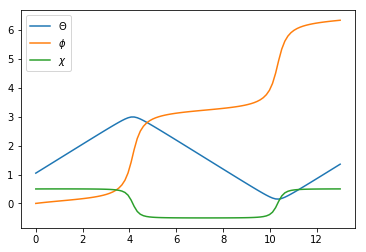

In [95]:
plt.plot(t[:], sol[:, 0], label='$\Theta $' )
plt.plot(t[:], sol[:, 1], label='$\phi$' )
plt.plot(t[:], sol[:, 2], label='$\chi$' )
plt.legend()
plt.show()

Let's plot in 3D

In [96]:
xv = np.sin(sol[:, 0])*np.cos(sol[:, 1])                                 
yv = np.sin(sol[:, 0])*np.sin(sol[:, 1])
zv = np.cos(sol[:, 0])

In [97]:
fig = plt.figure(figsize=(12,12), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
ax.plot(xv, yv, zv, 'k')

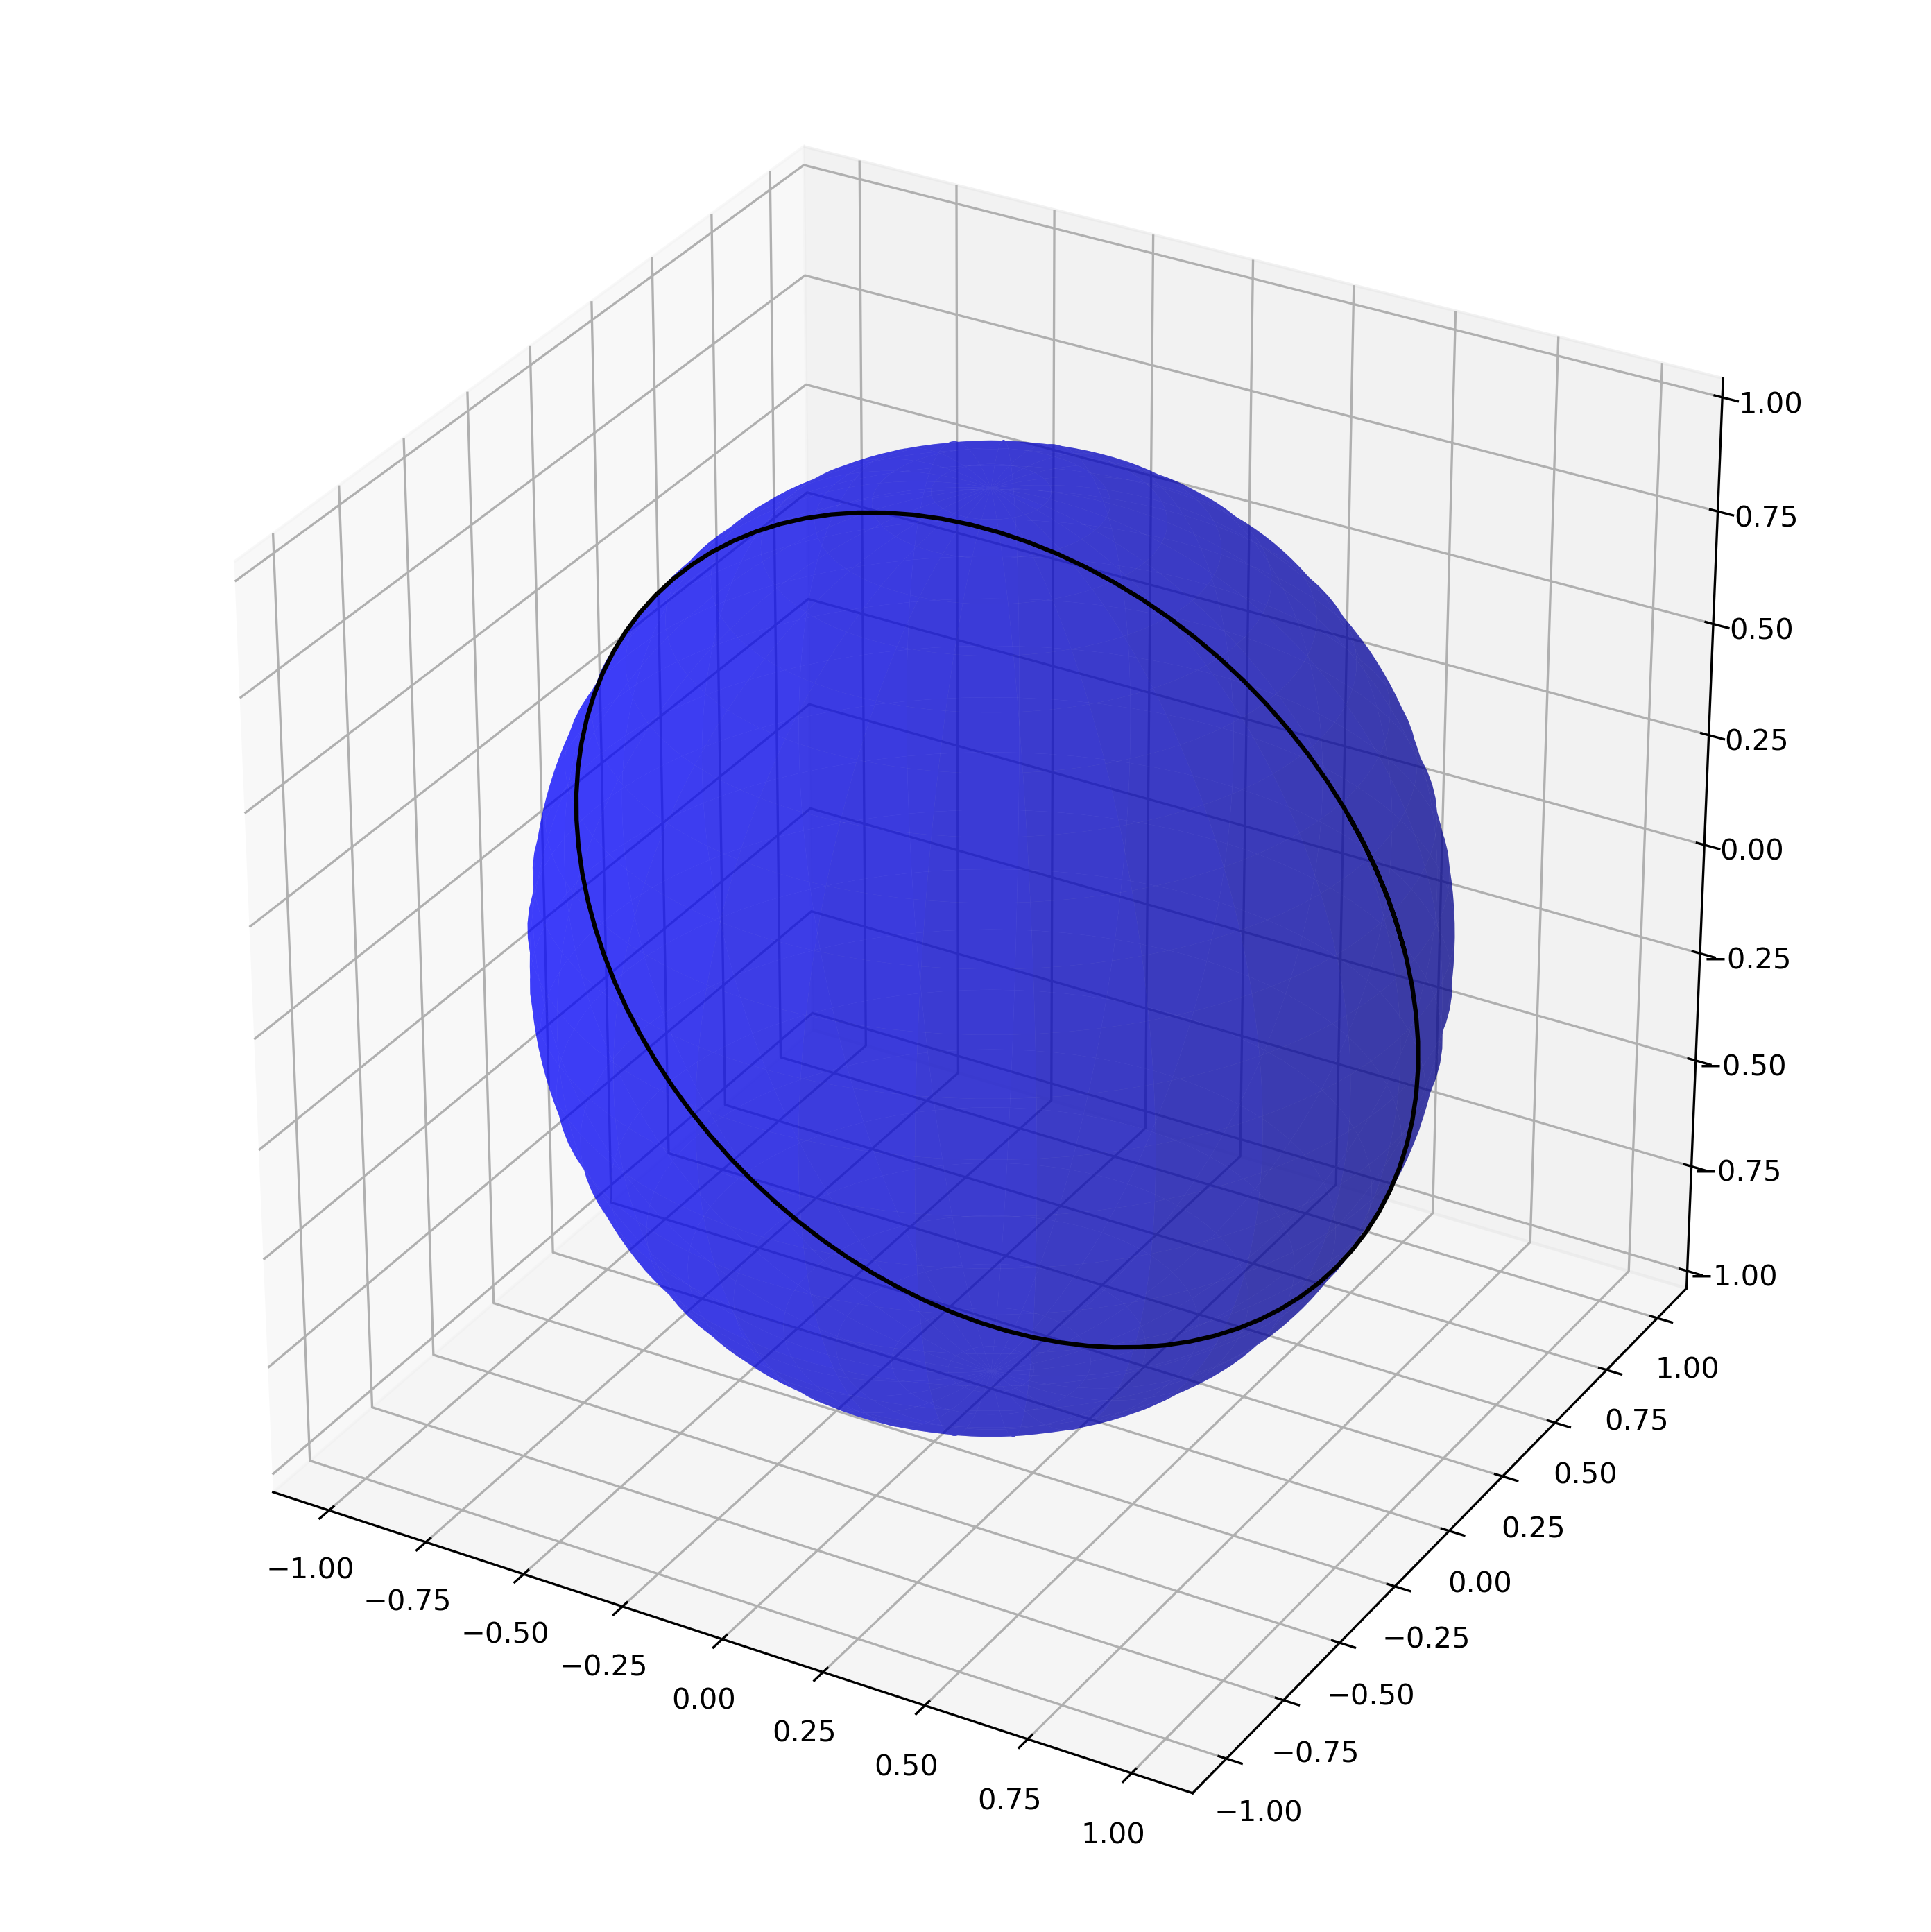

In [98]:
plt.show()

This is a full circle around the sphere, no sign problem occured in this method